In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#load some data in a pandas dataframe

df = None

# this data set represents the system during deployment at non-stationary conditions
df =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_deploymentNormalopenLabel.xlsx", index_col=0)

#df = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.csv", sep=";")

In [21]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

df.dtypes

systemState     object
VoltageA0      float64
VoltageA1      float64
VoltageA2        int64
S1              object
F1              object
F2              object
F3              object
F4              object
F5              object
F6              object
dtype: object

In [22]:
# get a preview on the data

#df.head(3)
df.describe()
#len(df["BRSTVD"])

,VoltageA0,VoltageA1,VoltageA2
count,1699.000000,1699.000000,1699.000000
mean,0.755491,0.426174,0.050029
std,1.743454,1.108845,0.497785
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000


array([[<AxesSubplot:xlabel='VoltageA0', ylabel='VoltageA0'>,
        <AxesSubplot:xlabel='VoltageA1', ylabel='VoltageA0'>,
        <AxesSubplot:xlabel='VoltageA2', ylabel='VoltageA0'>],
       [<AxesSubplot:xlabel='VoltageA0', ylabel='VoltageA1'>,
        <AxesSubplot:xlabel='VoltageA1', ylabel='VoltageA1'>,
        <AxesSubplot:xlabel='VoltageA2', ylabel='VoltageA1'>],
       [<AxesSubplot:xlabel='VoltageA0', ylabel='VoltageA2'>,
        <AxesSubplot:xlabel='VoltageA1', ylabel='VoltageA2'>,
        <AxesSubplot:xlabel='VoltageA2', ylabel='VoltageA2'>]],
      dtype=object)

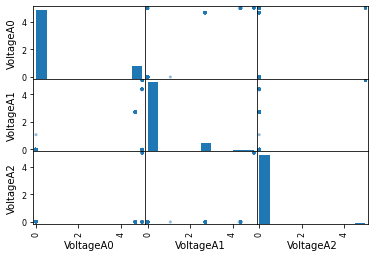

In [23]:
#make some scatter plots

pd.plotting.scatter_matrix(df)

In [24]:
# convert categorical variables into indicator functions

df = pd.get_dummies(df,columns=["S1","F1","F2","F3","F4","F5","F6"])
#df

In [25]:
# make a dictionary that maps the dummies to plain English

failure_dict = {}

failure_dict["F1_?"] = {0: "", 1:"WIRE_TO_LIGHT open circuit possible                                                                                                                             "}
failure_dict["F1_T"] = {0: "", 1:"WIRE_TO_LIGHT open circuit                                                                                                                                      "}
failure_dict["F1_F"] = {0: "", 1:"WIRE_TO_LIGHT no open circuit                                                                                                                                   "}

failure_dict["F2_?"] = {0: "", 1:"LIGHT open circuit possible                                                                                                                                     "}
failure_dict["F2_T"] = {0: "", 1:"LIGHT open circuit                                                                                                                                              "}
failure_dict["F2_F"] = {0: "", 1:"LIGHT no open circuit                                                                                                                                           "}

failure_dict["F3_?"] = {0: "", 1:"LIGHT short circuit possible                                                                                                                                    "}
failure_dict["F3_T"] = {0: "", 1:"LIGHT short circuit                                                                                                                                             "}
failure_dict["F3_F"] = {0: "", 1:"LIGHT no short circuit                                                                                                                                          "}

failure_dict["F4_?"] = {0: "", 1:"RESISTOR open circuit possible                                                                                                                                  "}
failure_dict["F4_T"] = {0: "", 1:"RESISTOR open circuit                                                                                                                                           "}
failure_dict["F4_F"] = {0: "", 1:"RESISTOR no open circuit                                                                                                                                        "}

failure_dict["F5_?"] = {0: "", 1:"RESISTOR short circuit possible                                                                                                                                 "}
failure_dict["F5_T"] = {0: "", 1:"RESISTOR short circuit                                                                                                                                          "}
failure_dict["F5_F"] = {0: "", 1:"RESISTOR no short circuit                                                                                                                                       "}

failure_dict["F6_?"] = {0: "", 1:"WIRE_TO_GROUND open circuit possible                                                                                                                            "}
failure_dict["F6_T"] = {0: "", 1:"WIRE_TO_GROUND open circuit                                                                                                                                     "}
failure_dict["F6_F"] = {0: "", 1:"WIRE_TO_GROUND no open circuit                                                                                                                                  "}

In [26]:
# define the response variable and convert it into an np.array
    
y_F1_  = np.array(df["F1_?"])
y_F1_F = np.array(df["F1_F"])
#y_F1_T = np.array(df["F1_T"])
    
y_F2_  = np.array(df["F2_?"])
y_F2_F = np.array(df["F2_F"])
y_F2_T = np.array(df["F2_T"])

y_F3_  = np.array(df["F3_?"])
y_F3_F = np.array(df["F3_F"])
#y_F3_T = np.array(df["F3_T"])
    
y_F4_  = np.array(df["F4_?"])
y_F4_F = np.array(df["F4_F"])
y_F4_T = np.array(df["F4_T"])

y_F5_  = np.array(df["F5_?"])
y_F5_F = np.array(df["F5_F"])
#y_F5_T = np.array(df["F5_T"])
    
y_F6_  = np.array(df["F6_?"])
y_F6_F = np.array(df["F6_F"])
y_F6_T = np.array(df["F6_T"])

In [27]:
#perform RF

from sklearn.impute import KNNImputer
#from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifie

from sklearn.inspection import permutation_importance

In [28]:
# define the explanatory variables

X=df.iloc[:,1:4]
X_names=df.iloc[:,1:4].columns

In [29]:
#dispose first column of the dataframe because it is not numerical

X_names


Index(['VoltageA0', 'VoltageA1', 'VoltageA2'], dtype='object')

In [30]:
#impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=5, weights="distance")
X=imputer.fit_transform(X)


In [31]:
# Define and fit the model

rf_F1_  = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F1_F = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
#rf_F1_T = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)

rf_F2_  = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F2_F = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F2_T = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)

rf_F3_  = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F3_F = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
#rf_F3_T = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)

rf_F4_  = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F4_F = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F4_T = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)

rf_F5_  = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F5_F = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
#rf_F5_T = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)

rf_F6_  = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F6_F = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F6_T = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)

rf_F1_.fit(X, y_F1_)
rf_F1_F.fit(X, y_F1_F)
#rf_F1_T.fit(X, y_F1_T)

rf_F2_.fit(X, y_F2_)
rf_F2_F.fit(X, y_F2_F)
rf_F2_T.fit(X, y_F2_T)

rf_F3_.fit(X, y_F3_)
rf_F3_F.fit(X, y_F3_F)
#rf_F3_T.fit(X, y_F3_T)

rf_F4_.fit(X, y_F4_)
rf_F4_F.fit(X, y_F4_F)
rf_F4_T.fit(X, y_F4_T)

rf_F5_.fit(X, y_F5_)
rf_F5_F.fit(X, y_F5_F)
#rf_F5_T.fit(X, y_F5_T)

rf_F6_.fit(X, y_F6_)
rf_F6_F.fit(X, y_F6_F)
rf_F6_T.fit(X, y_F6_T)

RandomForestClassifier(n_estimators=40)

In [32]:
#plot the importance of the various explanatory variables using Gini importance

#pd.DataFrame(rf_F1_.feature_importances_,index=X_names).sort_values(0,ascending=False)

In [33]:
# apply the RF classifier to the Arduino controller

In [34]:
import serial
import time
import keyboard

In [35]:
# connect with Arduino

ser = serial.Serial('COM3', 9600, timeout=1)
time.sleep(1)

In [36]:
# read write the serial connection at a given sampling rate

def write_read(x):
    ser.write(bytes(x, 'utf-8'))
    time.sleep(0.001)
    data = ser.readline()
    return data

In [37]:
# start to control the Arduino while collecting the data

i= True
num = '0'
print("Press <1> to switch power on")
print("Press <0> to switch power off")
print("Press <q> to quit")
print(".............................")

while i:  # making a loop
    
    if keyboard.is_pressed('q'):  # if key 'q' is pressed 
        print('')
        print('You Pressed <q>uit!')
        i = False                 # finishing the loop
        
    elif keyboard.is_pressed('0'): # if key '0' is pressed
        num = '0'
        
    elif keyboard.is_pressed('1'): # if key '1' is pressed
        num = '1'
        
    else:
        value = write_read(num)                          # if user pressed a key other than the given key the loop will break

        dummy = value.decode().rstrip().split()
        dum0 = np.array([[float(i) for i in dummy[1:]]])

        dum_F1_ = rf_F1_.predict(dum0)                         # 
        dum_F1_F = rf_F1_F.predict(dum0)
      #  dum_F1_T = rf_F1_T.predict(dum0)    

        dum_F2_ = rf_F2_.predict(dum0)                         # 
        dum_F2_F = rf_F2_F.predict(dum0)
        dum_F2_T = rf_F2_T.predict(dum0)    

        dum_F3_ = rf_F3_.predict(dum0)                         # 
        dum_F3_F = rf_F3_F.predict(dum0)
      #  dum_F3_T = rf_F3_T.predict(dum0)    

        dum_F4_ = rf_F4_.predict(dum0)                         # 
        dum_F4_F = rf_F4_F.predict(dum0)
        dum_F4_T = rf_F4_T.predict(dum0)    

        dum_F5_ = rf_F5_.predict(dum0)                         # 
        dum_F5_F = rf_F5_F.predict(dum0)
      #  dum_F5_T = rf_F5_T.predict(dum0) 
 
        dum_F6_ = rf_F6_.predict(dum0)                         # 
        dum_F6_F = rf_F6_F.predict(dum0)
        dum_F6_T = rf_F6_T.predict(dum0)  
        
        print(str(pd.to_datetime(round(time.time(), 0),unit = 's')),
              " Process values: ", np.around(dum0[0],2), "                                                                                                                             ",
              failure_dict["F1_?"][dum_F1_[0]], 
              failure_dict["F1_F"][dum_F1_F[0]], 
          #    failure_dict["F1_T"][dum_F1_T[0]], 

              failure_dict["F2_?"][dum_F2_[0]], 
              failure_dict["F2_F"][dum_F2_F[0]], 
              failure_dict["F2_T"][dum_F2_T[0]], 

              failure_dict["F3_?"][dum_F3_[0]], 
              failure_dict["F3_F"][dum_F3_F[0]], 
         #    failure_dict["F3_T"][dum_F3_T[0]], 

              failure_dict["F4_?"][dum_F4_[0]], 
              failure_dict["F4_F"][dum_F4_F[0]], 
              failure_dict["F4_T"][dum_F4_T[0]], 

              failure_dict["F5_?"][dum_F5_[0]], 
              failure_dict["F5_F"][dum_F5_F[0]], 
          #    failure_dict["F5_T"][dum_F5_T[0]], 

              failure_dict["F6_?"][dum_F6_[0]], 
              failure_dict["F6_F"][dum_F6_F[0]], 
              failure_dict["F6_T"][dum_F6_T[0]], 
              " .                                                                                                                                                               ",
              end = "\r")

        
ser.close()

Press <1> to switch power on
Press <0> to switch power off
Press <q> to quit
.............................
2022-07-19 11:13:16  Process values:  [0. 0. 0.]                                                                                                                               WIRE_TO_LIGHT open circuit possible                                                                                                                               LIGHT open circuit possible                                                                                                                                        LIGHT short circuit possible                                                                                                                                      RESISTOR open circuit possible                                                                                                                                     RESISTOR short circuit possible                                     

# 

# 